In [2]:
import numpy as np
import matplotlib.pyplot as plt
import timewarp_lib.load_model as lm
import timewarp_lib.train_utils as tu
import torch
import pandas as pd
import json
import numpy as np
import matplotlib

/home/travers/miniconda3/envs/timewarpvae/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
cmap = plt.get_cmap("viridis")

In [4]:

####clean_model_dirs = ["../results/overnight/20230921-093159.705744/savedmodel"] # TenDTWModel



In [5]:
import matplotlib
font = {        'size'   : 22}

matplotlib.rc('font', **font)

In [13]:
def make_all_scatter_inds(samp_interval, maxval):
    all_scatter_inds = []
    temp = []
    next_to_add = 0
    while next_to_add < maxval:
        temp.append(next_to_add)
        all_scatter_inds.append(list(temp))
        next_to_add += samp_interval
    
    return all_scatter_inds
all_scatter_inds = make_all_scatter_inds(1000,10001)
scatter_inds = all_scatter_inds[-1]

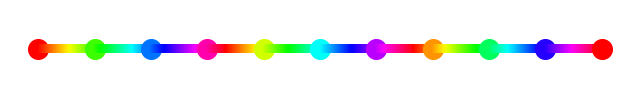

In [31]:
f = plt.figure(figsize=(8,1))
ttraj = np.linspace(0,1,10001)
xtraj = np.linspace(0,1,10001)
prev_split = None
for split in scatter_inds:
        if prev_split is None:
            plt.scatter(xtraj[split],np.zeros(10001)[split],
                        c=ttraj[split]*3%1,s=200,vmin=0,vmax=1,cmap="hsv")
        else:
            plt.scatter(xtraj[prev_split:split+1],
                        np.zeros(10001)[prev_split:split+1],
                        s=50,c=ttraj[prev_split:split+1]*3%1,vmin=0,vmax=1,cmap="hsv",marker="|")
            plt.scatter(xtraj[split],
                        np.zeros(10001)[split],
                        c=ttraj[split]*3%1,s=200,vmin=0,vmax=1,cmap="hsv")
        prev_split = split
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,0.05)
plt.axis("off")
plt.savefig(f"colorbar.png",bbox_inches='tight')            
plt.show()

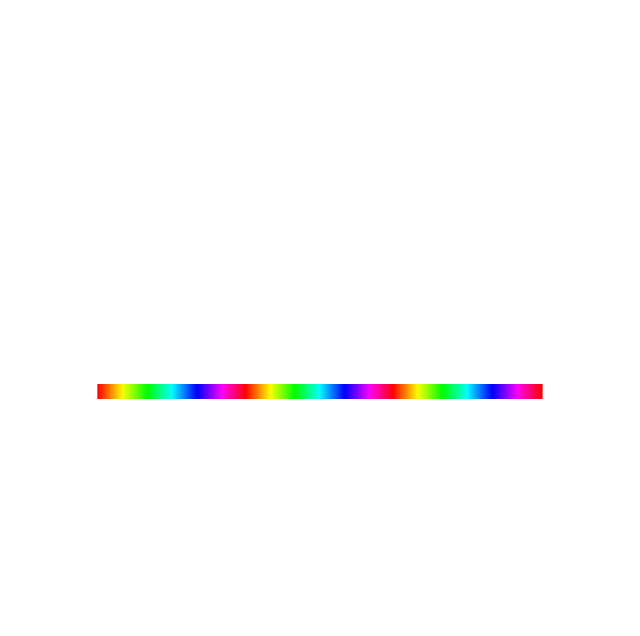

In [11]:
f = plt.figure(figsize=(8,8))
plt.scatter(np.linspace(0,1,10001),np.zeros(10001),s=120,c=np.linspace(0,1,10001)*3%1,vmin=0,vmax=1,cmap="hsv",marker="|")
plt.xlim(-0.2,1.2)
plt.ylim(-1.75,-1.75+4.6)
plt.axis("off")
plt.savefig(f"colorbar.jpg",bbox_inches='tight')            
plt.show()